## Exploratory Data Anlysis

### Import libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
raw_train = pd.read_csv('data/train.csv') #training tof, imu and thermo data
train_demographics = pd.read_csv('data/train_demographics.csv') #training demographics data

array([[<Axes: title={'center': 'adult_child'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'handedness'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'shoulder_to_wrist_cm'}>],
       [<Axes: title={'center': 'elbow_to_wrist_cm'}>, <Axes: >,
        <Axes: >]], dtype=object)

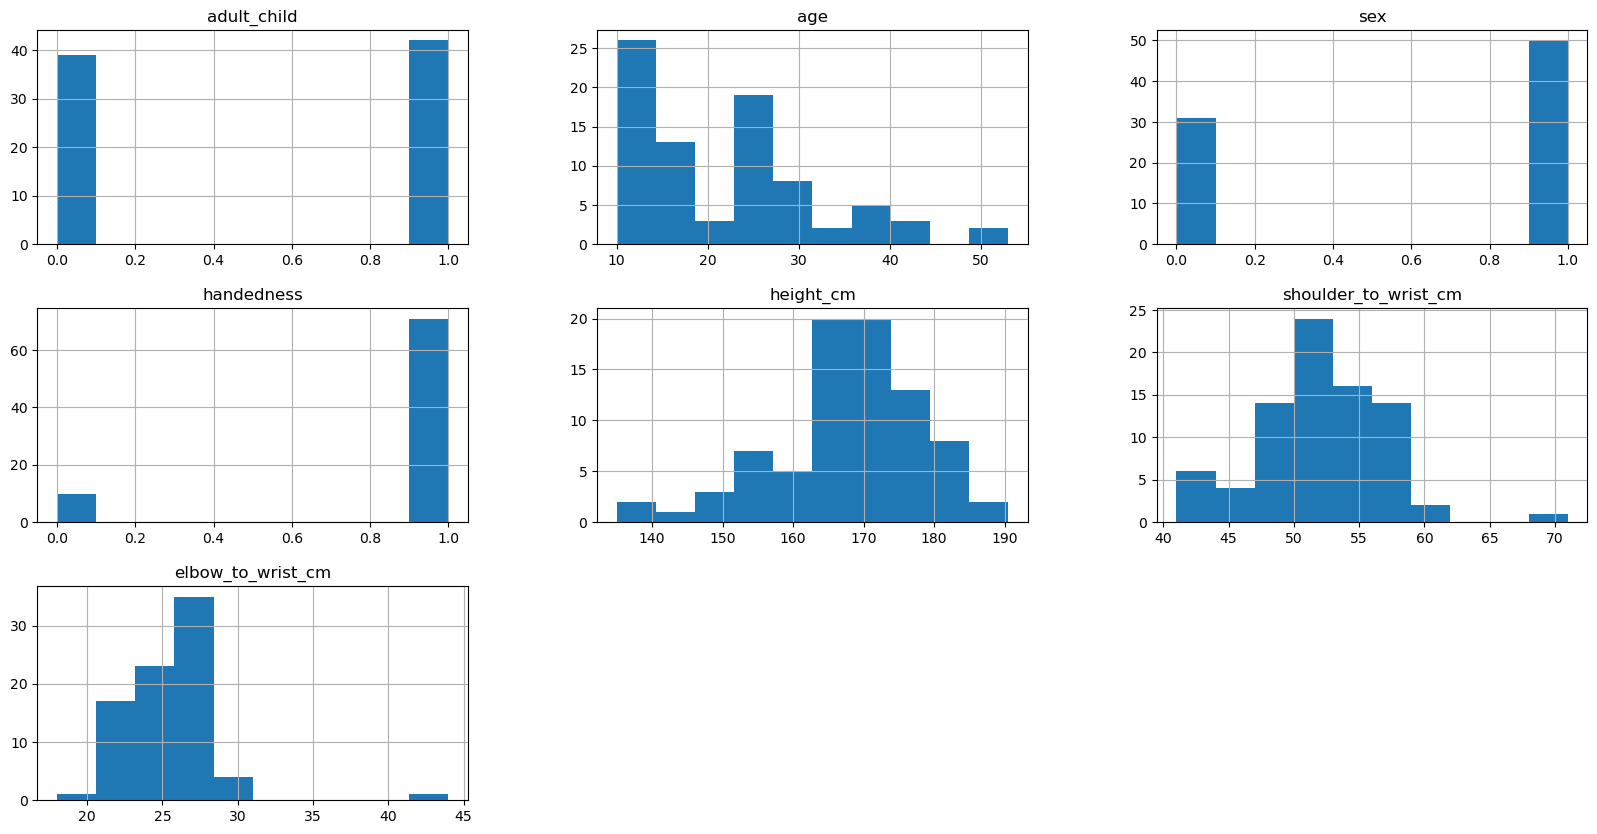

In [21]:
train_demographics.hist(figsize=(20, 10))

### Making 1D time-series sets from csv data

In [7]:
gestures = raw_train['gesture'].unique()
print(gestures)

['Cheek - pinch skin' 'Forehead - pull hairline' 'Write name on leg'
 'Feel around in tray and pull out an object' 'Neck - scratch'
 'Neck - pinch skin' 'Eyelash - pull hair' 'Eyebrow - pull hair'
 'Forehead - scratch' 'Above ear - pull hair' 'Wave hello'
 'Write name in air' 'Text on phone' 'Pull air toward your face'
 'Pinch knee/leg skin' 'Scratch knee/leg skin' 'Drink from bottle/cup'
 'Glasses on/off']


In [8]:
subjects = raw_train['subject'].unique()
print(subjects)

['SUBJ_059520' 'SUBJ_020948' 'SUBJ_040282' 'SUBJ_052342' 'SUBJ_032165'
 'SUBJ_024086' 'SUBJ_040733' 'SUBJ_063346' 'SUBJ_055211' 'SUBJ_001430'
 'SUBJ_012088' 'SUBJ_040310' 'SUBJ_032233' 'SUBJ_059330' 'SUBJ_013623'
 'SUBJ_032585' 'SUBJ_063464' 'SUBJ_038023' 'SUBJ_044680' 'SUBJ_024137'
 'SUBJ_030676' 'SUBJ_047636' 'SUBJ_053173' 'SUBJ_057917' 'SUBJ_040724'
 'SUBJ_049223' 'SUBJ_019262' 'SUBJ_053906' 'SUBJ_027682' 'SUBJ_058786'
 'SUBJ_000206' 'SUBJ_032761' 'SUBJ_017170' 'SUBJ_041243' 'SUBJ_019663'
 'SUBJ_061552' 'SUBJ_032704' 'SUBJ_011323' 'SUBJ_041770' 'SUBJ_040106'
 'SUBJ_039234' 'SUBJ_050642' 'SUBJ_021670' 'SUBJ_056936' 'SUBJ_042779'
 'SUBJ_034574' 'SUBJ_008304' 'SUBJ_064387' 'SUBJ_054811' 'SUBJ_045235'
 'SUBJ_017807' 'SUBJ_034631' 'SUBJ_024825' 'SUBJ_019297' 'SUBJ_035353'
 'SUBJ_027671' 'SUBJ_004117' 'SUBJ_042794' 'SUBJ_008728' 'SUBJ_003328'
 'SUBJ_017499' 'SUBJ_036450' 'SUBJ_019756' 'SUBJ_026824' 'SUBJ_063447'
 'SUBJ_063319' 'SUBJ_051942' 'SUBJ_028998' 'SUBJ_058967' 'SUBJ_038277'
 'SUBJ

In [ ]:
#sensor data lists
svm_data = []
thermo_data = []
tof_data = []
gyro_data = []

#demographics data
shoulder_to_wrist_cm = []
elbow_to_wrist_cm = []
height = []
handedness = []
adult_child = []
sex = []
age = []


#labels for each gesture and subject
labels = []
for gesture in gestures:   
    for subject in subjects:
        subject_data = raw_train[(raw_train['gesture'] == gesture) & (raw_train['subject'] == subject)]
        subject_demographics = train_demographics[train_demographics['subject'] == subject]

        
        #calculating svm (sensor vector magnitude) from accelerometer data
        svm = np.sqrt(subject_data['acc_x']**2 + subject_data['acc_y']**2 + subject_data['acc_z']**2)
        svm_data.append(svm.values)

        thermo_data.append(subject_data[['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']].values)
        gyro_data.append(subject_data[['rot_w', 'rot_x', 'rot_y', 'rot_z']].values)
        labels.append(gesture)

        #adding all tof data
        tof_cols = [f'tof_{sensor}_v{pixel}' for sensor in range(1, 6) for pixel in range(64)]
        tof_data.append(subject_data[tof_cols].values)

        #adding demographics data
        shoulder_to_wrist_cm.append(subject_demographics['shoulder_to_wrist_cm'].values[0])
        elbow_to_wrist_cm.append(subject_demographics['elbow_to_wrist_cm'].values[0])
        height.append(subject_demographics['height_cm'].values[0])
        handedness.append(subject_demographics['handedness'].values[0])
        adult_child.append(subject_demographics['adult_child'].values[0])
        sex.append(subject_demographics['sex'].values[0])
        age.append(subject_demographics['age'].values[0])

        
        